In [1]:
#의사결정나무 모형(moons 데이터셋)
from sklearn.datasets import make_moons
#noise 표준편차
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=42)

In [3]:
from sklearn.tree import DecisionTreeClassifier
#criterion(entropy, gini) - 노드 분할 기준 
#entropy는 정보량에 따라 분류(정보가 많을 수록 확률 낮아짐),log를 취해 더 무겁다
#gini는 순도,불순도에 따라 분류(다른 분류가 나올 확률)
#엔트로피가 지니보다 성능, 평가가 높다 / 그러나 무겁기때문에 연산속도는 지니가 더 앞선다.
#출처 https://wyatt37.tistory.com/9

model = DecisionTreeClassifier(random_state=2, max_depth=3, criterion='entropy')
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=2)

In [4]:
print('학습용:',model.score(X_train,y_train))
print('검증용:',model.score(X_test,y_test))

학습용: 0.9066666666666666
검증용: 0.92


[Text(0.4090909090909091, 0.875, 'X[1] <= 0.06\nentropy = 1.0\nsamples = 75\nvalue = [37, 38]'),
 Text(0.18181818181818182, 0.625, 'X[0] <= -0.617\nentropy = 0.242\nsamples = 25\nvalue = [1, 24]'),
 Text(0.09090909090909091, 0.375, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2727272727272727, 0.375, 'entropy = 0.0\nsamples = 24\nvalue = [0, 24]'),
 Text(0.6363636363636364, 0.625, 'X[0] <= 1.166\nentropy = 0.855\nsamples = 50\nvalue = [36, 14]'),
 Text(0.45454545454545453, 0.375, 'X[0] <= -0.15\nentropy = 0.601\nsamples = 41\nvalue = [35, 6]'),
 Text(0.36363636363636365, 0.125, 'entropy = 0.0\nsamples = 16\nvalue = [16, 0]'),
 Text(0.5454545454545454, 0.125, 'entropy = 0.795\nsamples = 25\nvalue = [19, 6]'),
 Text(0.8181818181818182, 0.375, 'X[0] <= 1.672\nentropy = 0.503\nsamples = 9\nvalue = [1, 8]'),
 Text(0.7272727272727273, 0.125, 'entropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(0.9090909090909091, 0.125, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]')]

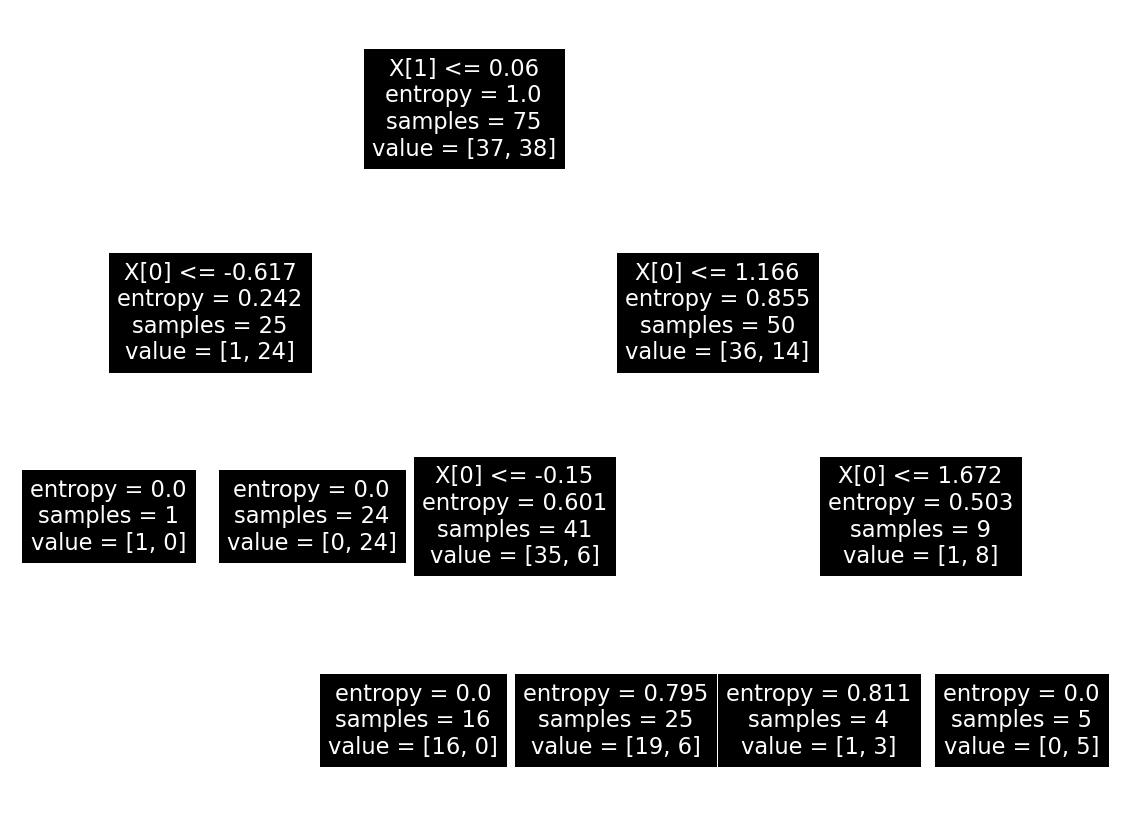

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(20,15))
tree.plot_tree(model)

In [6]:
#동전 던지기를 했는데 앞뒤면이 반반씩 나온다면 불확실성 최대, 한면만 게속 나온다면 순도 최대
#엔트로피 : A 영역에 속한 모든 샘플이 동일한 범주에 속할 경우(불확실성 최소, 순도 최대) => 엔트로피 0
#         반반씩 섞여있을 경우(불확실성 최대, 순도 최소) => 엔트로피 1
#gini index(지니계수) : 0.0~0.5의 값, 작을수록 분류가 잘된 것(0이면 불확실성 최소, 순도 최대), 0.5이면 불확실설 최대, 순도 최소

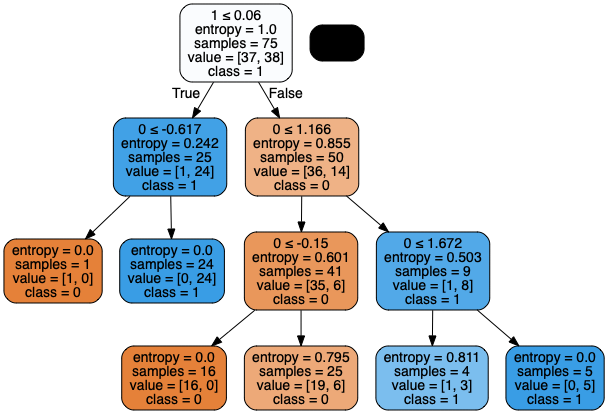

In [10]:
from sklearn.tree import export_graphviz
import pydotplus #conda install -c conda-forge pydotplus
import graphviz #conda install -c conda-forge python-graphviz
from IPython.display import Image #conda install -c conda-forge ipython

dot_data = export_graphviz(model, out_file=None, feature_names=[0,1], class_names=['0','1'],filled=True,rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

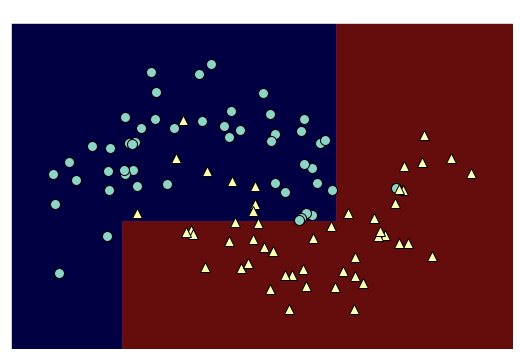

In [16]:
import matplotlib.pyplot as plt
import mglearn
plt.figure(figsize=(9,6))
plt.title('Tree')
#클래스 구분면
mglearn.plots.plot_2d_separator(model, X, fill=True, alpha=0.4)
#산점도
mglearn.discrete_scatter(X[:,0],X[:,1],y)